In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import tqdm
import statsmodels.tsa.stattools

In [192]:
def f(x,K,c,t):
    return (x*(1-x/K)-c*(x**2/(x**2 +1)))

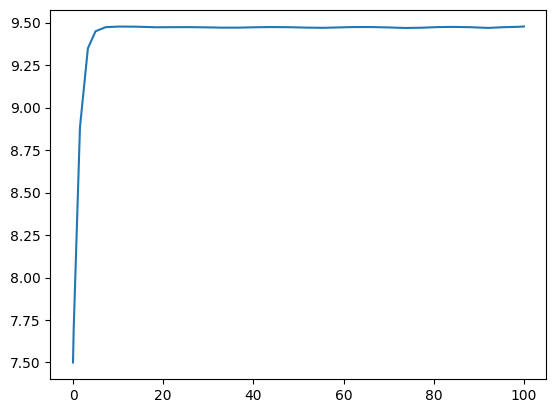

In [214]:
K = 10 #carrying capacity
c = 0.5 #reslience: 1 high, 2.6 low
sol = scipy.integrate.solve_ivp(lambda t,x: f(x,K,c,t),(0,100),[7.5])
equil = sol.y[0,-1]
plt.plot(sol.t,sol.y[0])

In [215]:
Tstart = 0
Tend = 100
npoints = 10000

dt = (Tend - Tstart)/npoints
xs = np.zeros(npoints)
xs[0] = equil

W = np.random.normal(scale=np.sqrt(dt),size=xs.size)
t = 0

for i in tqdm.trange(npoints-1):
    xs[i+1] = xs[i] + f(xs[i],K,c,t)*dt + W[i]

100%|██████████| 9999/9999 [00:00<00:00, 408856.32it/s]


Text(0, 0.5, 'State')

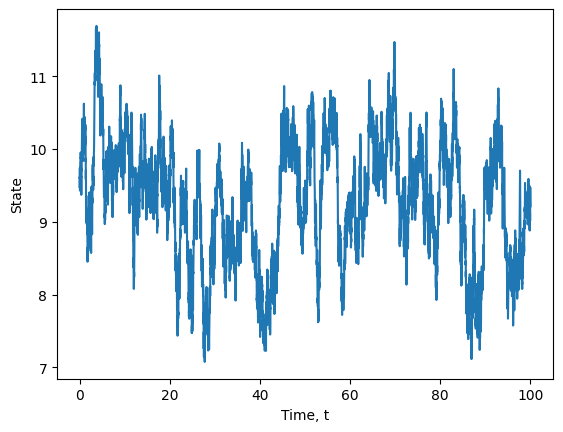

In [216]:
ts = np.linspace(Tstart,Tend,npoints)
plt.plot(ts,xs)
plt.xlabel('Time, t')
plt.ylabel('State')

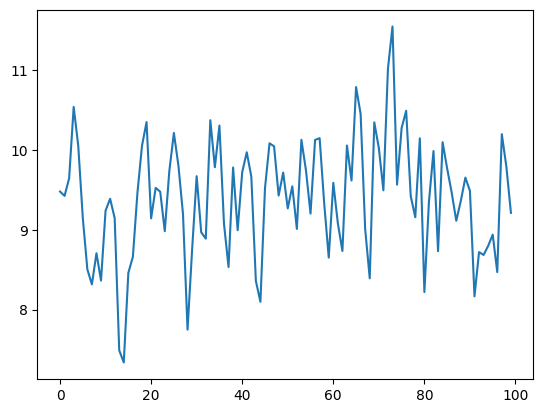

In [121]:
plt.plot(np.arange(100),xs[::100])

Text(10, 7.5, 'variance =  0.678\nAC(1) =  0.993')

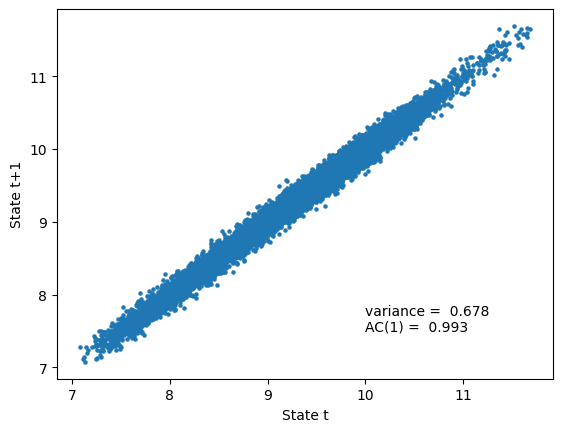

In [217]:
#lag-1 plot
k = 1
var = np.var(xs)

# statsmodels.tsa.tsatools.detrend(xs, order=0)  or  xs-np.mean(xs)
ac_1 = statsmodels.tsa.stattools.acf(xs-np.mean(xs))[1]



plt.scatter(xs[:npoints-k],xs[k:],s=5)
plt.xlabel('State t')
plt.ylabel('State t+1')
plt.text(10,7.5,f'variance = {var: .3f}\nAC(1) = {ac_1: .3f}')

In [201]:
np.var(xs), ac_1

(0.561420743616605, 0.9910088636118762)

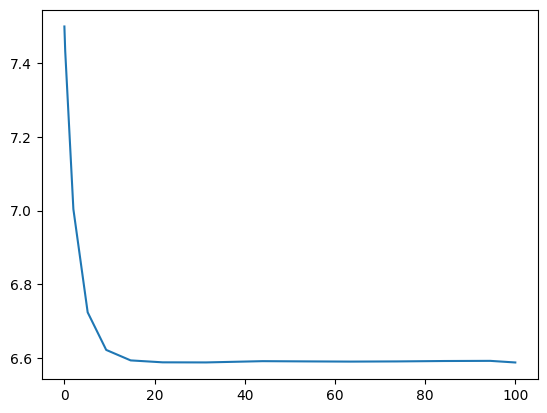

In [248]:
K = 10 #carrying capacity
c = 2.3 #reslience: 0.5 high, 2.3 low
sol = scipy.integrate.solve_ivp(lambda t,x: f(x,K,c,t),(0,100),[7.5])
equil = sol.y[0,-1]
plt.plot(sol.t,sol.y[0])

In [249]:
Tstart = 0
Tend = 100
npoints = 10000

dt = (Tend - Tstart)/npoints
xs = np.zeros(npoints)
xs[0] = equil

W = np.random.normal(scale=np.sqrt(dt),size=xs.size)
t = 0

for i in tqdm.trange(npoints-1):
    xs[i+1] = xs[i] + f(xs[i],K,c,t)*dt + W[i]

100%|██████████| 9999/9999 [00:00<00:00, 354575.59it/s]


Text(0, 0.5, 'State')

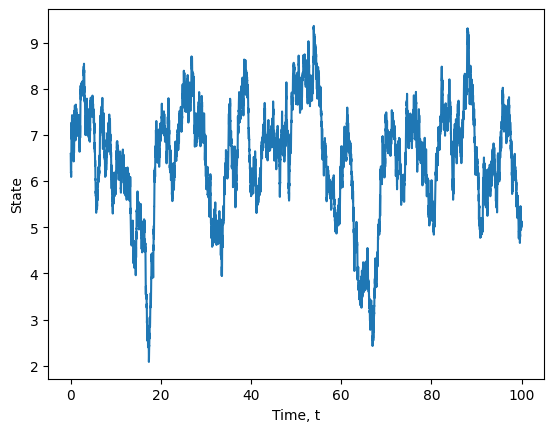

In [250]:
ts = np.linspace(Tstart,Tend,npoints)
plt.plot(ts,xs)
plt.xlabel('Time, t')
plt.ylabel('State')


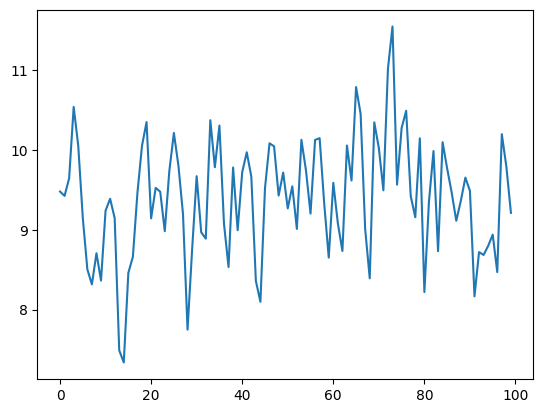

In [123]:
plt.plot(np.arange(100),xs[::100])

Text(7.5, 4.5, 'variance =  1.495\nAC(1) =  0.997')

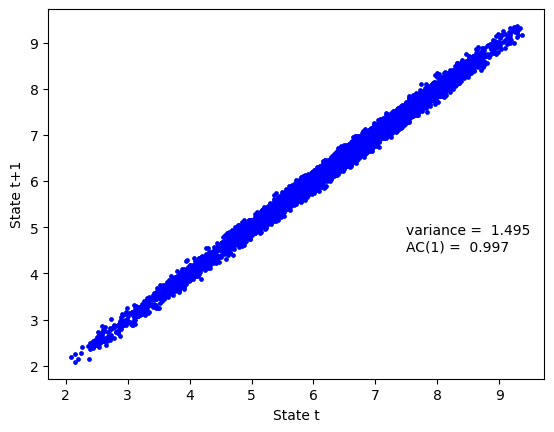

In [251]:
#lag-1 plot
k = 1
plt.scatter(xs[:npoints-k],xs[k:],s=5)
var = np.var(xs)

# statsmodels.tsa.tsatools.detrend(xs, order=0)  or  xs-np.mean(xs)
ac_1 = statsmodels.tsa.stattools.acf(xs-np.mean(xs))[1]



plt.scatter(xs[:npoints-k],xs[k:],s=5,c='blue')
plt.xlabel('State t')
plt.ylabel('State t+1')
plt.text(7.5,4.5,f'variance = {var: .3f}\nAC(1) = {ac_1: .3f}')


In [169]:
np.var(xs), ac_1

(2.0358917727103334, 0.9975335765518996)